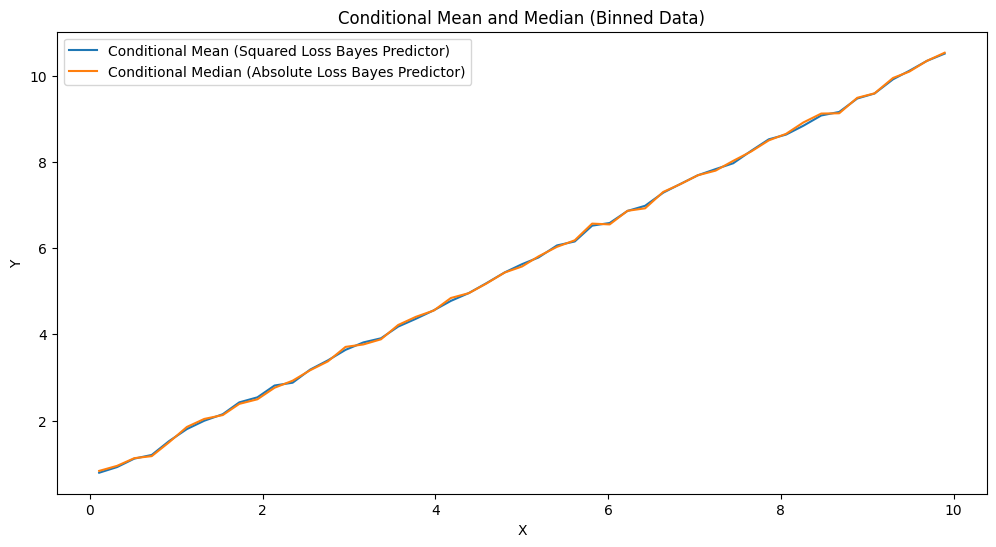

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import pandas as pd

# Generate synthetic data with an asymmetric distribution
np.random.seed(42)
n_samples = 10000  # Increase sample size for better approximation
X = np.random.rand(n_samples, 1) * 10  # Uniformly distributed X in [0, 10]
Y = 0.7 * (X.squeeze() + np.random.randn(n_samples)) + 0.3 * (X.squeeze() + 2 + np.random.randn(n_samples))

# Convert to DataFrame for easier handling
data = pd.DataFrame({'X': X.squeeze(), 'Y': Y})

# Bin the data
bins = np.linspace(0, 10, 50)  # 50 bins from 0 to 10
data['bin'] = np.digitize(data['X'], bins)

# Calculate the mean and median within each bin
binned_data = data.groupby('bin').agg({'X': 'mean', 'Y': ['mean', 'median']}).reset_index()
binned_data.columns = ['bin', 'X_mean', 'Y_mean', 'Y_median']

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(binned_data['X_mean'], binned_data['Y_mean'], label='Conditional Mean (Squared Loss Bayes Predictor)')
plt.plot(binned_data['X_mean'], binned_data['Y_median'], label='Conditional Median (Absolute Loss Bayes Predictor)')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Conditional Mean and Median (Binned Data)')
plt.show()

We can see a subtle difference between the conditional mean and the conditional median